In [97]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
import torch
from GPUtil import GPUtil

from utils import load_dataset, make_data, MyDataSet
from torch.utils.data import DataLoader
from pytorch_lighting_model.lighting_slice import model_encoder
from torch.utils.data import random_split
from pytorch_lightning.callbacks import ModelCheckpoint

import pytorch_lightning as pl

tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:1')
<class 'torch.Tensor'> tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:1')


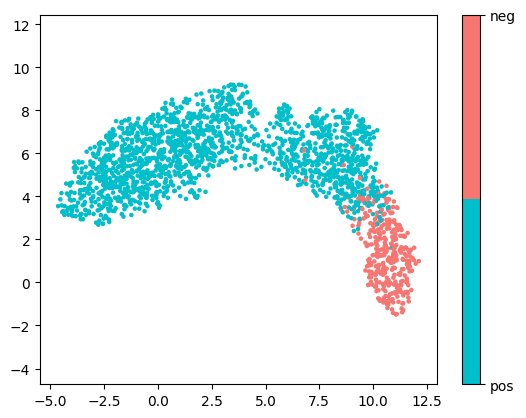

1
tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:1')
<class 'torch.Tensor'> tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:1')


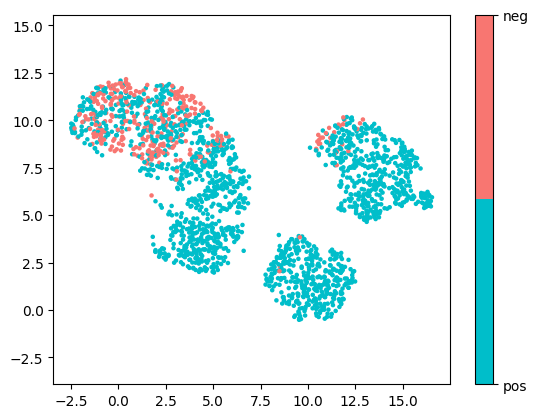

1
tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:1')
<class 'torch.Tensor'> tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:1')


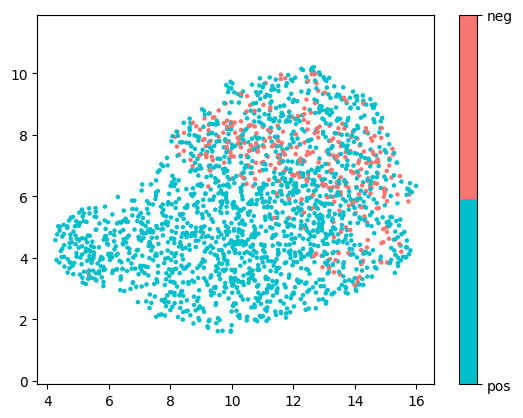

1
tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')
<class 'torch.Tensor'> tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')


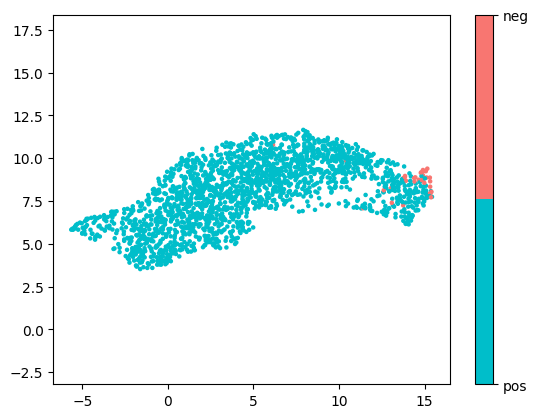

1
tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')
<class 'torch.Tensor'> tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')


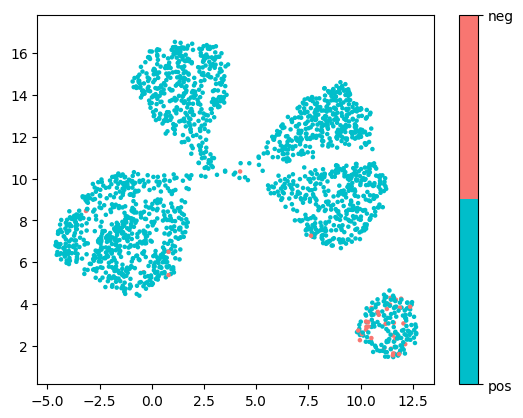

1
tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')
<class 'torch.Tensor'> tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')


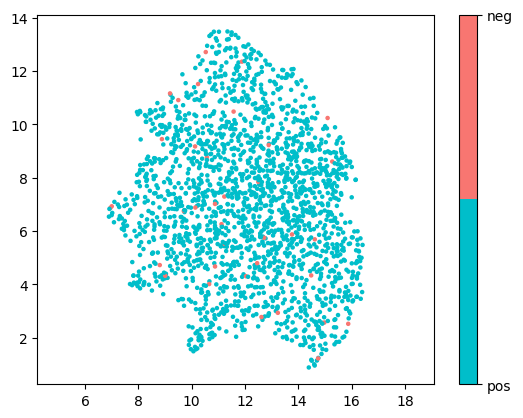

1
ok


In [105]:
def draw_umap(repres_list, label_list, m, d):
    # 配色、名称、坐标轴待统一样式修改
    # print(repres_list)
    # print(np.array(repres_list).shape)
    # fig=plt.figure()
    cmap = ListedColormap(['#00beca', '#f87671'])
    repres_list = repres_list.cpu()
    print(type(label_list), label_list)
    label_list = label_list.cpu()
    repres = np.array(repres_list)
    label = np.array(label_list)
    scaled_data = StandardScaler().fit_transform(repres)
    reducer = umap.UMAP(min_dist=0.5)
    embedding = reducer.fit_transform(scaled_data)
    colors = np.array(["#00beca", "#f87671"])
    # print(embedding)
    sc = plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=label, cmap=cmap, s=5
    )
    # l1, = plt.plot([], [], 'o', color='#00beca', label='positive')
    # l2, = plt.plot([], [], 'o', color='#f87671', label='negative')
    # global flag
    # if flag:
    #     plt.legend(bbox_to_anchor=(-0.15, 1.1), loc=1, borderaxespad=0)
    #     flag=False
    # plt.legend(loc='best')

    # fig, ax = plt.subplots()
    # # title = "The number of different protein residues(Train)"
    # ax.spines['right'].set_visible(False)
    # ax.spines['top'].set_visible(False)
    plt.gca().set_aspect('equal', 'datalim')

    cbar = plt.colorbar(sc, ticks=[0, 1])
    cbar.ax.set_yticklabels(['pos', 'neg'])  # horizontal colorbar

#     plt.title('UMAP projection', fontsize=24)
    plt.savefig('{}_{}_umap.svg'.format(m, d), format='svg')
    plt.show()
    return plt
reps = ['rep_rice_slice.pt', 'rep_rice_RNN.pt', 'rep_rice_BERT.pt', 'slice_tha_rep.pt', 'RNN_tha_rep.pt', 'BERT_tha_rep.pt']
lables = ['label_rice_slice.pt', 'label_rice_BERT.pt', 'label_rice_BERT.pt', 'slice_lable.pt', 'lable.pt', 'lable.pt']
for i, n in enumerate(reps):
    rep = torch.load(reps[i])
    lable = torch.load(lables[i])
    print(lable)
    model = ''
    data = 'tha'
    if i%3 == 0:
        model = 'slice'
    elif i%3 == 1:
        model = 'RNN'
    elif i%3 == 2:
        model = 'BERT'
        
    if i < 3:
        data = 'rice'
    plt = draw_umap(rep, lable, model, data)
    print('1')
print('ok')

/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


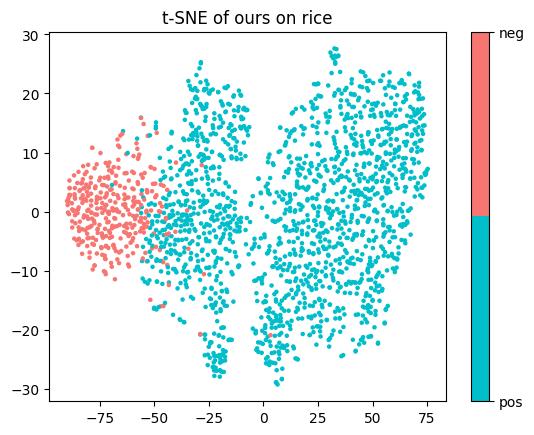

/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


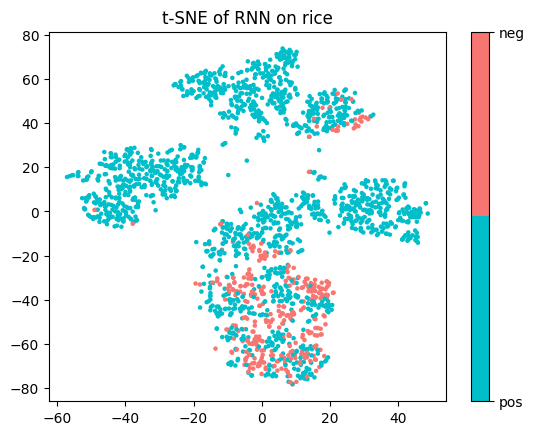

/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


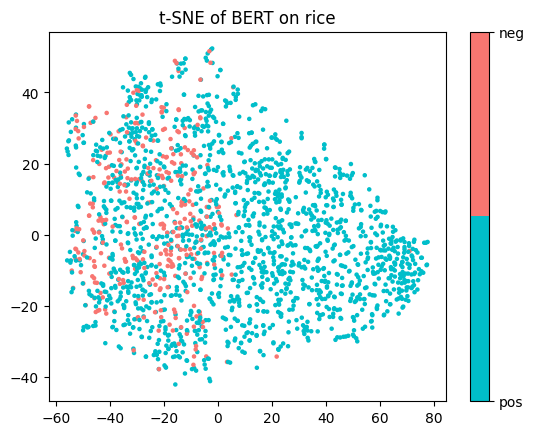

/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


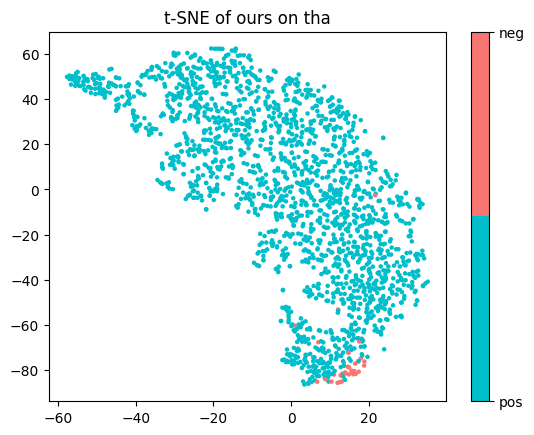

/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


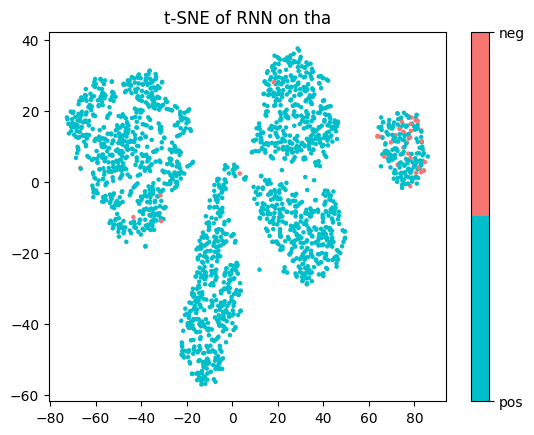

/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


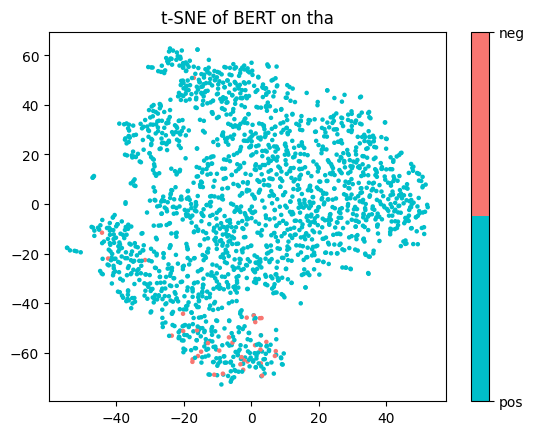

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

def draw_tsne(repres_list, label_list, model, data):
    cmap = ListedColormap(['#00beca', '#f87671'])
    repres_list = repres_list.cpu()
    label_list = label_list.cpu()
    repres = np.array(repres_list)
    label = np.array(label_list)
    scaled_data = StandardScaler().fit_transform(repres)
    tsne = TSNE(n_components=2, random_state=42)
    embedding = tsne.fit_transform(scaled_data)
    colors = np.array(["#00beca", "#f87671"])
    plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=label, cmap=cmap, s=5
    )
    cbar = plt.colorbar(ticks=[0, 1])
    cbar.ax.set_yticklabels(['pos', 'neg'])
    plt.title('t-SNE of {} on {}'.format(model, data))
    plt.savefig('{}_{}_tsne.svg'.format(model, data), format='svg')
    plt.savefig('{}_{}_tsne.png'.format(model, data), format='png')
    plt.show()

# 示例用法
reps = ['rep_rice_slice.pt', 'rep_rice_RNN.pt', 'rep_rice_BERT.pt', 'slice_tha_rep.pt', 'RNN_tha_rep.pt', 'BERT_weight_tha_rep.pt']
labels = ['label_rice_slice.pt', 'label_rice_BERT.pt', 'label_rice_BERT.pt', 'slice_lable.pt', 'lable.pt', 'lable.pt']
for i, rep_file in enumerate(reps):
    label_file = labels[i]
    rep = torch.load(rep_file)
    label = torch.load(label_file)
    model = ''
    data = 'tha'
    if i % 3 == 0:
        model = 'ours'
    elif i % 3 == 1:
        model = 'RNN'
    elif i % 3 == 2:
        model = 'BERT'
    if i < 3:
        data = 'rice'
    draw_tsne(rep, label, model, data)


In [23]:
# 这是自动读取目录里面的model性能
def extract_metrics(file_name):
    metrics = {}
    parts = file_name.split('-')
    
    for part in parts:
        if part.startswith('avg_val_'):
            key_value = part.split('=')[-1]
            key, value = key_value.split('_')
            metrics[key] = float(value)
    
    return metrics

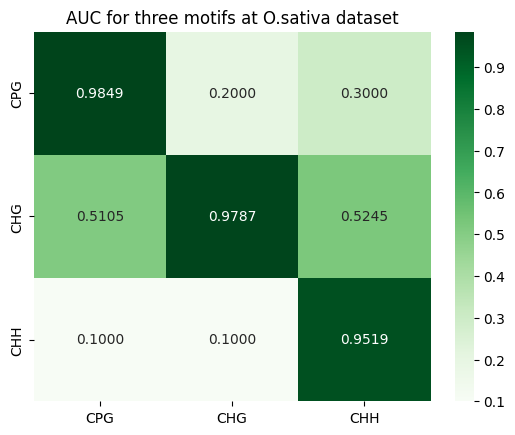

In [143]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 创建3x3的数据数组
data = np.array([[.98495, .2, .3],
                 [.5104856648147368, .97867, .5245],
                 [0.1, 0.1, 0.95193]])

x_labels = ['CPG', 'CHG', 'CHH']
y_labels = x_labels.copy()

# 使用Seaborn绘制热力图
ax = sns.heatmap(data, cmap='Greens', annot=True, fmt=".4f")

# 设置x轴和y轴标签
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
ax.set_title('AUC for three motifs at O.sativa dataset')
plt.savefig('motif_AUC.svg', format='svg')
# 显示图形
plt.show()

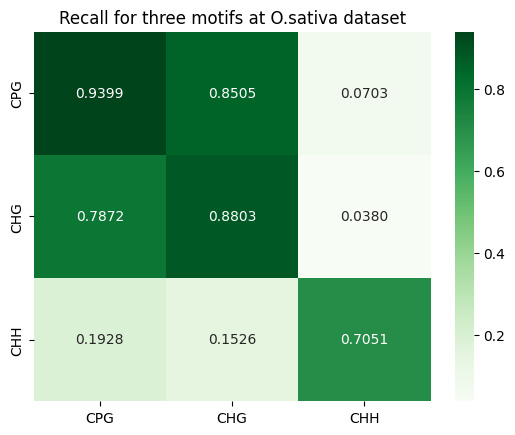

In [140]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 创建3x3的数据数组
data = np.array([[.93987, .850480675, .0702510],
                 [.787191271, .88029, .0380482338300244522],
                 [0.192776188, 0.1525562852, .70510]])

x_labels = ['CPG', 'CHG', 'CHH']
y_labels = x_labels.copy()

# 使用Seaborn绘制热力图
ax = sns.heatmap(data, cmap='Greens', annot=True, fmt=".4f")

# 设置x轴和y轴标签
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
ax.set_title('Recall for three motifs at O.sativa dataset')
plt.savefig('motif_Recall.svg', format='svg')
# 显示图形
plt.show()

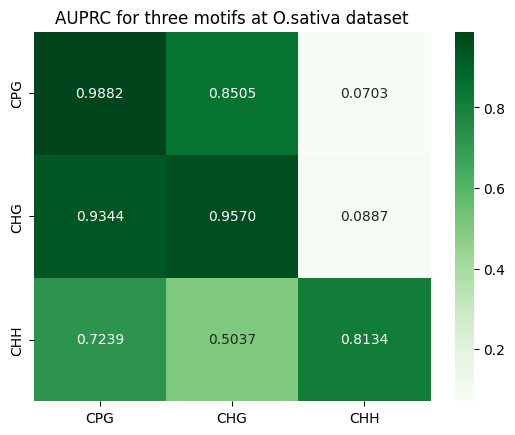

In [141]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 创建3x3的数据数组
data = np.array([[.98822, .850480675, .0702510],
                 [.934371769421, .95700, .08870873600244522],
                 [0.7239035367, 0.503747701, .81341]])

x_labels = ['CPG', 'CHG', 'CHH']
y_labels = x_labels.copy()

# 使用Seaborn绘制热力图
ax = sns.heatmap(data, cmap='Greens', annot=True, fmt=".4f")

# 设置x轴和y轴标签
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
ax.set_title('AUPRC for three motifs at O.sativa dataset')
plt.savefig('motif_AUPRC.svg', format='svg')
# 显示图形
plt.show()

## model
```
chh
sample-mnist-epoch=45-avg_val_ACC=0.95830-avg_val_AUPRC=0.81341-avg_val_AUROC=0.95193-avg_val_Precision=0.79217-avg_val_Recall=0.70510-avg_val_F1Score=0.74274.ckpt
cpg
sample-mnist-epoch=57-avg_val_ACC=0.94248-avg_val_AUPRC=0.98822-avg_val_AUROC=0.98495-avg_val_Precision=0.95411-avg_val_Recall=0.93987-avg_val_F1Score=0.94692.ckpt
chg
sample-mnist-epoch=23-avg_val_ACC=0.95835-avg_val_AUPRC=0.95700-avg_val_AUROC=0.97867-avg_val_Precision=0.93465-avg_val_Recall=0.88029-avg_val_F1Score=0.90657.ckpt
```
```
chg_cpg:	 [{'test_loss': 1.6527260541915894, 'test_ACC': 0.83564, 'test_AUPRC': 0.9343717694282532, 'test_AUROC': 0.9220544670415058, 'test_Precision': 0.8993626236915588, 'test_Recall': 0.7871912717819214, 'test_F1Score': 0.8392980098724365, 'avg_test_loss': 1.6527258157730103, 'avg_test_ACC': 0.83564, 'avg_test_AUPRC': 0.9343717694282532, 'avg_test_AUROC': 0.9220544670415057, 'avg_test_Precision': 0.8993626832962036, 'avg_test_Recall': 0.7871910333633423, 'avg_test_F1Score': 0.8392979502677917}]

chg_chh:	 [{'test_loss': 1.0223058462142944, 'test_ACC': 0.8885344978420623, 'test_AUPRC': 0.08870873600244522, 'test_AUROC': 0.5, 'test_Precision': 0.08870873600244522, 'test_Recall': 0.03804823383688927, 'test_F1Score': 0.053197428584098816, 'avg_test_loss': 1.0240966081619263, 'avg_test_ACC': 0.8882632491976754, 'avg_test_AUPRC': 0.08925318717956543, 'avg_test_AUROC': 0.5, 'avg_test_Precision': 0.08925318717956543, 'avg_test_Recall': 0.03828510642051697, 'avg_test_F1Score': 0.053527601063251495}]

cpg_chg:	 [{'test_loss': 1.3754692077636719, 'test_ACC': 0.8724166666666666, 'test_AUPRC': 0.8185699582099915, 'test_AUROC': 0.9329673526804766, 'test_Precision': 0.6789020895957947, 'test_Recall': 0.8504804968833923, 'test_F1Score': 0.7544091939926147, 'avg_test_loss': 1.3754686117172241, 'avg_test_ACC': 0.8724166666666668, 'avg_test_AUPRC': 0.8185703754425049, 'avg_test_AUROC': 0.9329673526804777, 'avg_test_Precision': 0.6789018511772156, 'avg_test_Recall': 0.8504806756973267, 'avg_test_F1Score': 
0.754408597946167}]

cpg_chh:	 [{'test_loss': 2.303860664367676, 'test_ACC': 0.7280342353901784, 'test_AUPRC': 0.08870873600244522, 'test_AUROC': 0.5, 'test_Precision': 0.08870873600244522, 'test_Recall': 0.06983042508363724, 'test_F1Score': 0.07812222093343735, 'avg_test_loss': 2.3034980297088623, 'avg_test_ACC': 0.7280615838320756, 'avg_test_AUPRC': 0.08925318717956543, 'avg_test_AUROC': 0.5, 'avg_test_Precision': 0.08925318717956543, 'avg_test_Recall': 0.07025101780891418, 'avg_test_F1Score': 0.0785968154668808}]

chh_cpg:	 [{'test_loss': 6.017616271972656, 'test_ACC': 0.53504, 'test_AUPRC': 0.7239035367965698, 'test_AUROC': 0.6900019712989701, 'test_Precision': 0.813953697681427, 'test_Recall': 0.19277618825435638, 'test_F1Score': 0.31114479899406433, 'avg_test_loss': 6.017615795135498, 'avg_test_ACC': 0.5350400000000001, 'avg_test_AUPRC': 0.7239035964012146, 'avg_test_AUROC': 0.6900019712989702, 'avg_test_Precision': 0.8139533400535583, 'avg_test_Recall': 0.192776158452034, 'avg_test_F1Score': 0.31114500761032104}]

chh_chg:	 [{'test_loss': 3.5702736377716064, 'test_ACC': 0.7891633333333333, 'test_AUPRC': 0.5037477016448975, 'test_AUROC': 0.7437281545732489, 'test_Precision': 0.7029256224632263, 'test_Recall': 0.15255628526210785, 'test_F1Score': 0.24921205639839172, 'avg_test_loss': 3.570274829864502, 'avg_test_ACC': 0.7891633333333334, 'avg_test_AUPRC': 0.5037477612495422, 'avg_test_AUROC': 0.743728154573249, 'avg_test_Precision': 0.7029255628585815, 'avg_test_Recall': 0.15255628526210785, 'avg_test_F1Score': 0.24921201169490814}]

```


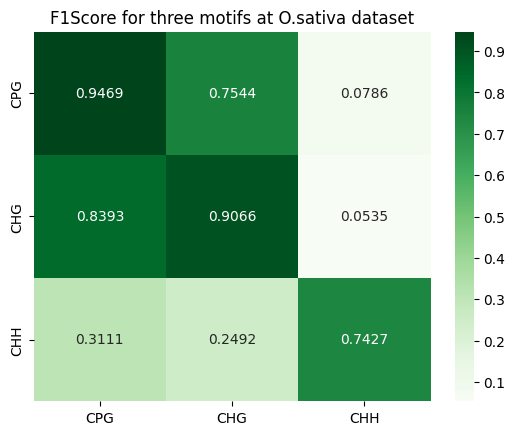

In [142]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 创建3x3的数据数组
data = np.array([[.94692, .754408597945, .0785968154610],
                 [.8392979502671, .90657, .053527601063522],
                 [0.3111450076103267, 0.24921201169490801, .74274]])

x_labels = ['CPG', 'CHG', 'CHH']
y_labels = x_labels.copy()

# 使用Seaborn绘制热力图
ax = sns.heatmap(data, cmap='Greens', annot=True, fmt=".4f")

# 设置x轴和y轴标签
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
ax.set_title('F1Score for three motifs at O.sativa dataset')
plt.savefig('motif_F1Score.svg', format='svg')
# 显示图形
plt.show()

In [125]:
data_load1 = load_dataset("/mnt/sde/ycl/Nanopore_program_copy/Nanopore_data/motif/cpg_small.csv")
sequence1, nano_data1, label1 = make_data(data_load1)
cpg_nano = nano_data1.numpy()
cpg_label = label1.numpy()
print('ok')

ok


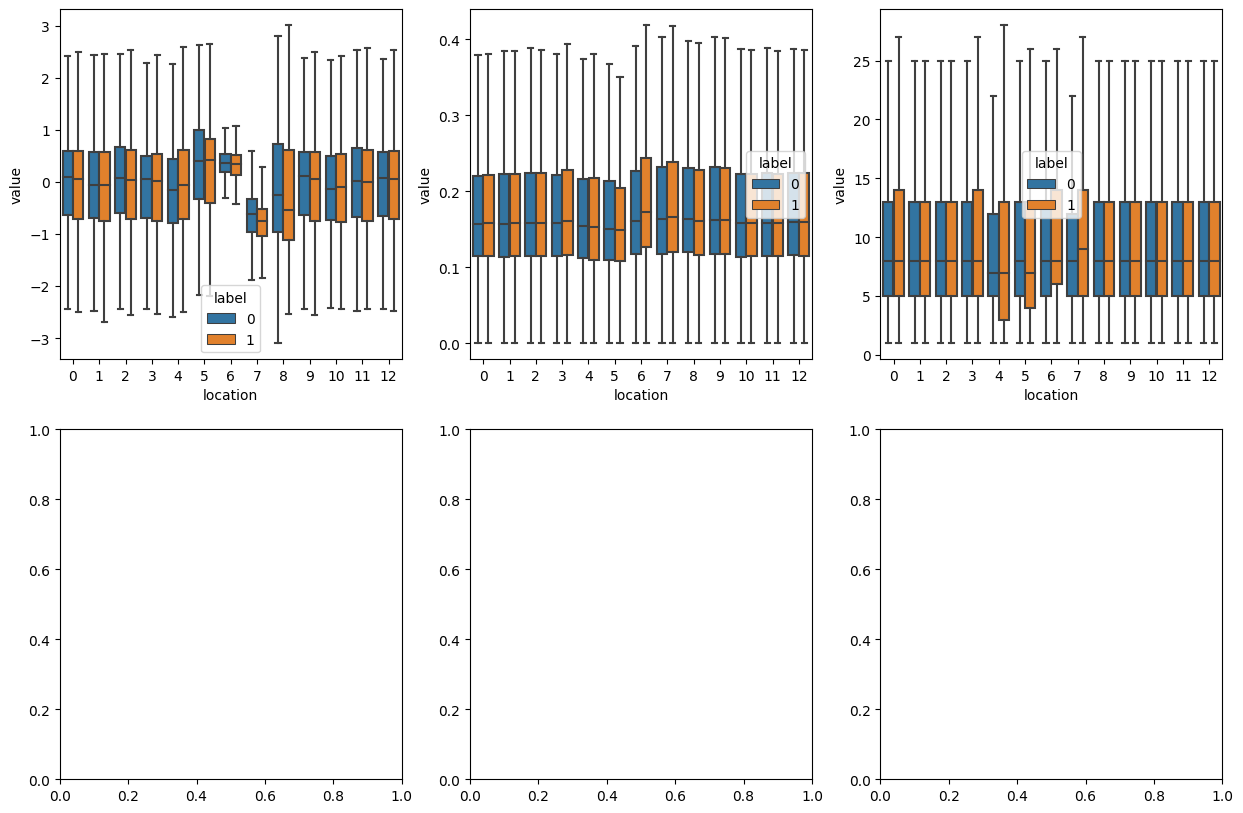

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 cpg_nano 是一个形状为 (30000, 13, 3) 的 NumPy 数组
# 假设 cpg_label 是一个长度为 30000 的 NumPy 数组

# 创建一个空的 DataFrame 来保存我们的数据
df = pd.DataFrame()

# 循环遍历 cpg_nano 的第三维度
for i in range(cpg_nano.shape[2]):
    # 将 cpg_nano 的第三维度划分成一列，并将其添加到 df 中
    df_temp = pd.DataFrame(cpg_nano[:,:,i].reshape(-1, cpg_nano.shape[1]))
    df_temp['label'] = cpg_label
    df_temp['category'] = i
    df = pd.concat([df, df_temp])

# 设置列名
df.columns = [''+str(i) for i in range(cpg_nano.shape[1])] + ['label', 'category']

# 将 df 重塑为长格式，以便我们可以使用 seaborn 绘制箱型图
df_melt = df.melt(id_vars=['label', 'category'], var_name='location', value_name='value')

# 创建一个 2x3 的图形
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# 循环遍历每一个类别
for i in range(1):
    for j in range(3):
        # 在当前子图上绘制箱型图
        sns.boxplot(x='location', y='value', hue='label', data=df_melt[df_melt['category']==i*3+j], showfliers=False, ax=axs[i, j])

# 显示图形
plt.savefig('cpg_signal.svg', format='svg')
plt.show()



In [123]:
data_load1 = load_dataset("/mnt/sde/ycl/Nanopore_program_copy/Nanopore_data/motif/chg_small.csv")
sequence1, nano_data1, label1 = make_data(data_load1)
cpg_nano = nano_data1.numpy()
cpg_label = label1.numpy()
print('ok')

ok


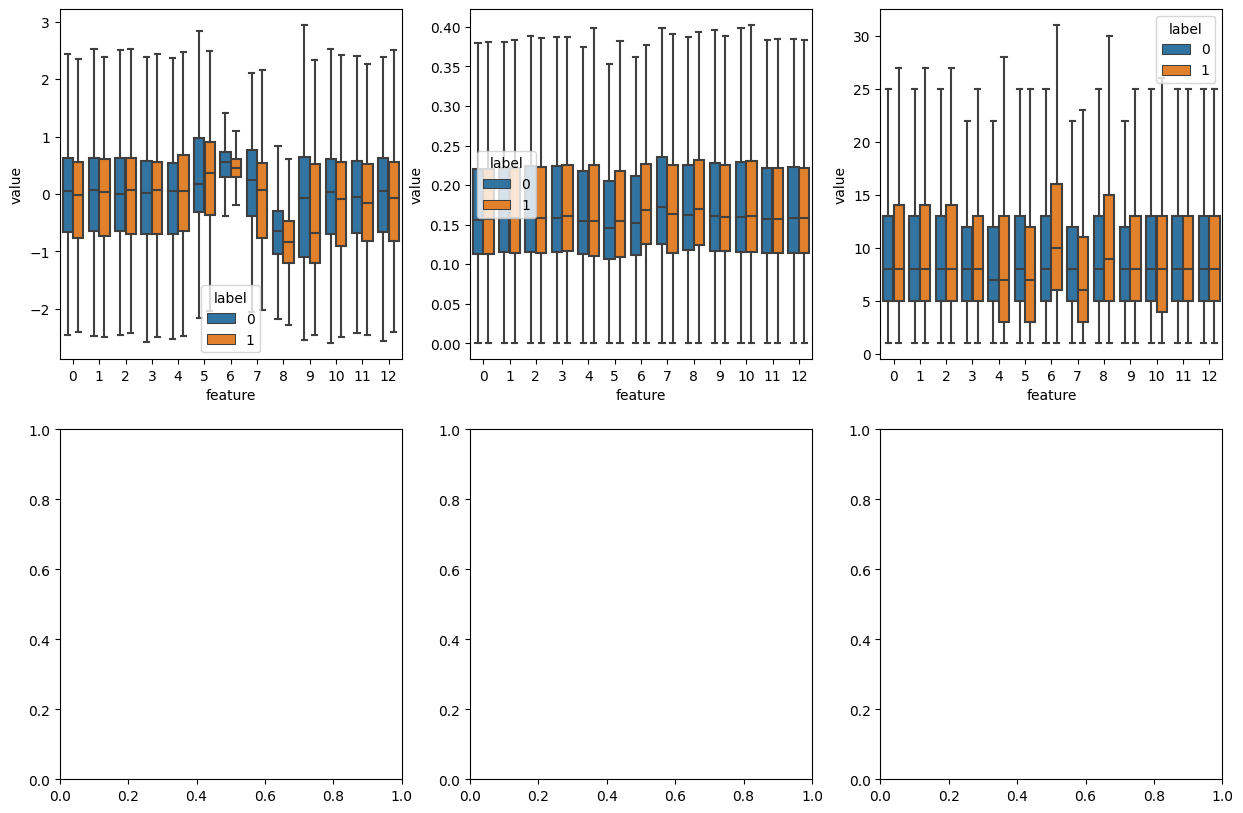

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 cpg_nano 是一个形状为 (30000, 13, 3) 的 NumPy 数组
# 假设 cpg_label 是一个长度为 30000 的 NumPy 数组

# 创建一个空的 DataFrame 来保存我们的数据
df = pd.DataFrame()

# 循环遍历 cpg_nano 的第三维度
for i in range(cpg_nano.shape[2]):
    # 将 cpg_nano 的第三维度划分成一列，并将其添加到 df 中
    df_temp = pd.DataFrame(cpg_nano[:,:,i].reshape(-1, cpg_nano.shape[1]))
    df_temp['label'] = cpg_label
    df_temp['category'] = i
    df = pd.concat([df, df_temp])

# 设置列名
df.columns = [''+str(i) for i in range(cpg_nano.shape[1])] + ['label', 'category']

# 将 df 重塑为长格式，以便我们可以使用 seaborn 绘制箱型图
df_melt = df.melt(id_vars=['label', 'category'], var_name='feature', value_name='value')

# 创建一个 2x3 的图形
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# 循环遍历每一个类别
for i in range(1):
    for j in range(3):
        # 在当前子图上绘制箱型图
        sns.boxplot(x='feature', y='value', hue='label', data=df_melt[df_melt['category']==i*3+j], showfliers=False, ax=axs[i, j])

# 显示图形
plt.savefig('chg_signal.svg', format='svg')
plt.show()


In [112]:
data_load1 = load_dataset("/mnt/sde/ycl/Nanopore_program_copy/Nanopore_data/motif/chh_TMP.csv")
sequence1, nano_data1, label1 = make_data(data_load1)
cpg_nano = nano_data1.numpy()
cpg_label = label1.numpy()
print('ok')

ok


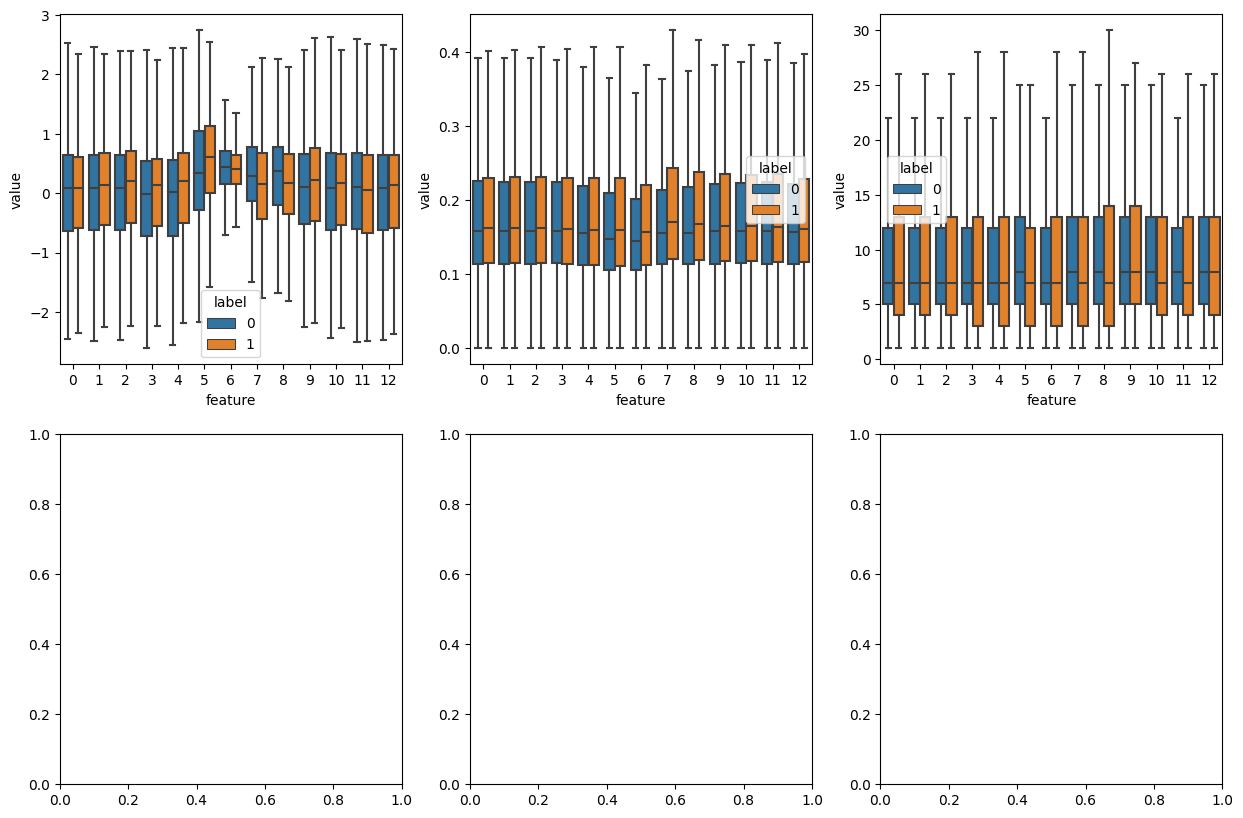

ok


In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 cpg_nano 是一个形状为 (30000, 13, 3) 的 NumPy 数组
# 假设 cpg_label 是一个长度为 30000 的 NumPy 数组

# 创建一个空的 DataFrame 来保存我们的数据
df = pd.DataFrame()

# 循环遍历 cpg_nano 的第三维度
for i in range(cpg_nano.shape[2]):
    # 将 cpg_nano 的第三维度划分成一列，并将其添加到 df 中
    df_temp = pd.DataFrame(cpg_nano[:,:,i].reshape(-1, cpg_nano.shape[1]))
    df_temp['label'] = cpg_label
    df_temp['category'] = i
    df = pd.concat([df, df_temp])

# 设置列名
df.columns = [''+str(i) for i in range(cpg_nano.shape[1])] + ['label', 'category']

# 将 df 重塑为长格式，以便我们可以使用 seaborn 绘制箱型图
df_melt = df.melt(id_vars=['label', 'category'], var_name='feature', value_name='value')


# 创建一个 2x3 的图形
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# 循环遍历每一个类别
for i in range(1):
    for j in range(3):
        # 在当前子图上绘制箱型图
        sns.boxplot(x='feature', y='value', hue='label', data=df_melt[df_melt['category']==i*3+j], showfliers=False, ax=axs[i, j])
#         sns.savefig('chh_signal{}.svg'.format(j), format='svg')

# 显示图形
plt.savefig('chh_signal.svg', format='svg')
plt.show()
print('ok')

<class 'torch.Tensor'> tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:1')


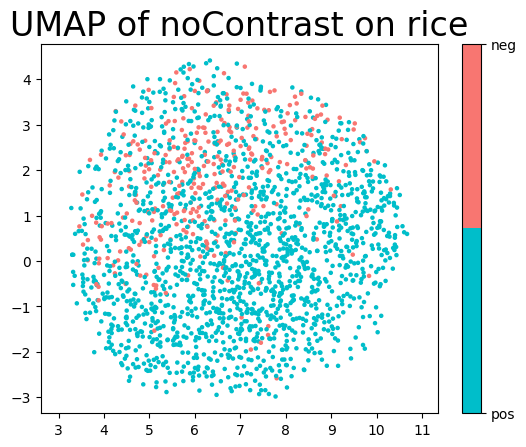

<module 'matplotlib.pyplot' from '/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [138]:
def draw_umap(repres_list, label_list, m, d):
    # 配色、名称、坐标轴待统一样式修改
    # print(repres_list)
    # print(np.array(repres_list).shape)
    # fig=plt.figure()
    cmap = ListedColormap(['#00beca', '#f87671'])
    repres_list = repres_list.cpu()
    print(type(label_list), label_list)
    label_list = label_list.cpu()
    repres = np.array(repres_list)
    label = np.array(label_list)
    scaled_data = StandardScaler().fit_transform(repres)
    reducer = umap.UMAP(min_dist=0.5)
    embedding = reducer.fit_transform(scaled_data)
    colors = np.array(["#00beca", "#f87671"])
    # print(embedding)
    sc = plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=label, cmap=cmap, s=5
    )
    # l1, = plt.plot([], [], 'o', color='#00beca', label='positive')
    # l2, = plt.plot([], [], 'o', color='#f87671', label='negative')
    # global flag
    # if flag:
    #     plt.legend(bbox_to_anchor=(-0.15, 1.1), loc=1, borderaxespad=0)
    #     flag=False
    # plt.legend(loc='best')

    # fig, ax = plt.subplots()
    # # title = "The number of different protein residues(Train)"
    # ax.spines['right'].set_visible(False)
    # ax.spines['top'].set_visible(False)
    plt.gca().set_aspect('equal', 'datalim')

    cbar = plt.colorbar(sc, ticks=[0, 1])
    cbar.ax.set_yticklabels(['pos', 'neg'])  # horizontal colorbar

    plt.title('UMAP of {} on {}'.format(m, d), fontsize=24)
    plt.savefig('{}_{}_umap.svg'.format(m, d), format='svg')
    plt.show()
    return plt
rep = torch.load('rep_rice_traditional1.pt')
label = torch.load('label_rice_slice.pt')
draw_umap(rep, label, 'noContrast', 'rice')